# Confronto tra Insertion Sort e Quick Sort
Notebook per il corso *Laboratorio di Algoritmi*

In questo notebook confronteremo le prestazioni di due algoritmi di ordinamento:
- **Insertion Sort**
- **Quick Sort**

Verranno generati dati casuali, eseguiti i test e mostrati i risultati tramite grafici e tabelle.


In [1]:
import random
import time
import matplotlib.pyplot as plt


## Descrizione degli algoritmi

### Insertion Sort
Algoritmo semplice e intuitivo: scorre l’array da sinistra verso destra e inserisce ogni elemento nella corretta posizione tra quelli già ordinati.  
Efficiente solo su liste molto piccole o quasi ordinate.
- **Complessità**:
  - caso migliore: Θ(n)  
  - caso medio e peggiore: Θ(n²)

### Quick Sort
Algoritmo *divide-et-impera*: seleziona un pivot, partiziona l’array in elementi minori, uguali e maggiori, e ordina ricorsivamente le due parti.  
Molto veloce nella pratica (e molto più veloce di insertion sort).
- **Complessità**:  
  - caso medio: Θ(n log n)  
  - caso peggiore: Θ(n²)

L’obiettivo degli esperimenti sarà verificare queste differenze empiricamente.

In [2]:
def insertion_sort(arr):
    a = arr[:]  # copia per non modificare l'array originale
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a


In [3]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    center = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + center + quick_sort(right)


## Generazione dei dati di test

Generiamo array casuali di dimensioni crescenti.  
Ogni esecuzione del notebook crea nuovi dati grazie al modulo `random`.

Questo permette di verificare sperimentalmente le differenze tra i due algoritmi.


In [4]:
sizes = [100, 300, 500, 800, 1000]  # modifiche a piacere
datasets = {n: [random.randint(0, 10000) for _ in range(n)] for n in sizes}

sizes


[100, 300, 500, 800, 1000]

## Misurazioni del tempo di esecuzione

Per ogni dimensione dell’array eseguiamo:
- una copia dell’array per **Insertion Sort**
- una copia per **Quick Sort**

Per misurare i tempi utilizziamo `time.perf_counter()`.
I risultati ottenuti rispecchiano il comportamento medio degli algoritmi.


In [5]:
def measure_time(func, arr):
    start = time.perf_counter()
    func(arr)
    end = time.perf_counter()
    return end - start

results_insertion = []
results_quick = []

for n in sizes:
    arr = datasets[n]
    results_insertion.append(measure_time(insertion_sort, arr))
    results_quick.append(measure_time(quick_sort, arr))

results_insertion, results_quick


([0.0002760929928626865,
  0.0024076720001176,
  0.005876051989616826,
  0.015414533001603559,
  0.03477559200837277],
 [0.00018320602248422801,
  0.00047681399155408144,
  0.0007364909979514778,
  0.001730535994283855,
  0.002389707020483911])

## Risultati sperimentali

Di seguito visualizziamo i tempi ottenuti tramite un grafico.

Ci aspettiamo che QuickSort risulti molto più veloce di Insertion Sort.
- **Insertion Sort** ha complessità quadratica Θ(n²) e cresce molto rapidamente al crescere della dimensione.
- **Quick Sort** ha un tempo medio Θ(n log n) ed è in genere molto più veloce.


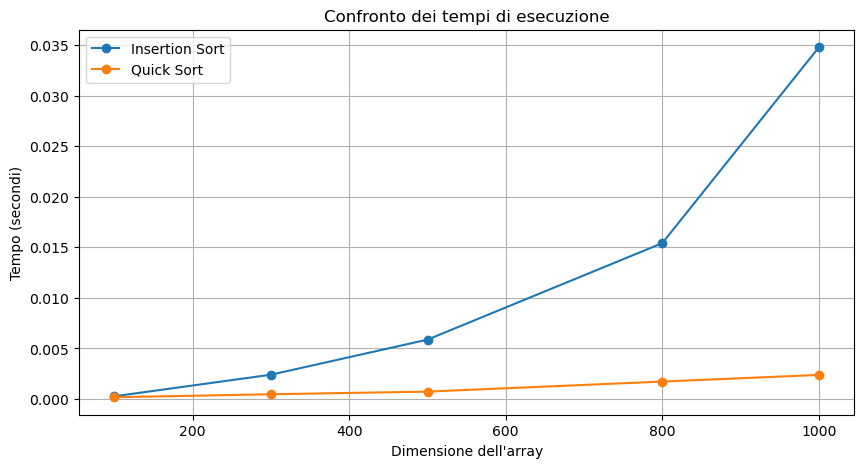

In [6]:
plt.figure(figsize=(10,5))
plt.plot(sizes, results_insertion, marker='o', label="Insertion Sort")
plt.plot(sizes, results_quick, marker='o', label="Quick Sort")
plt.xlabel("Dimensione dell'array")
plt.ylabel("Tempo (secondi)")
plt.title("Confronto dei tempi di esecuzione")
plt.legend()
plt.grid(True)
plt.show()


## Conclusioni

I risultati sperimentali ottenuti mostrano chiaramente un divario di prestazioni:

- **Insertion Sort** ha tempi molto più elevati e cresce rapidamente con la dimensione dell'input, in modo quasi quadratico, come previsto dalla complessità Θ(n²).
- **Quick Sort** mantiene tempi molto più bassi e risulta decisamente più veloce, confermando un comportamento medio Θ(n log n).

Questi esperimenti sono pienamente coerenti con la teoria:
Quick Sort è generalmente l’algoritmo di ordinamento più efficiente nella pratica,
mentre Insertion Sort rimane utile solo per input di piccole dimensioni o quasi ordinati.
